# 数据压缩

## ASC-II字符压缩

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

A = [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
B = [1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
C = [0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
D = [1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
E = [1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
F = [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
G = [0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
H = [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
I = [0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
J = [0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

data = np.array([A, B, C, D, E, F, G, H, I, J])
loss_history = []

Iteration 0: Cost = 2.5065665554481744
Iteration 100: Cost = 1.9466737595638677
Iteration 200: Cost = 1.5013755660935342
Iteration 300: Cost = 1.330279137642835
Iteration 400: Cost = 1.2731535023448497
Iteration 500: Cost = 1.2490430478555758
Iteration 600: Cost = 1.2348626949087327
Iteration 700: Cost = 1.2229017742790662
Iteration 800: Cost = 1.2084350617438764
Iteration 900: Cost = 1.1855950612658153
Iteration 1000: Cost = 1.1445117684519395
Iteration 1100: Cost = 1.072978982522202
Iteration 1200: Cost = 0.9826020447922711
Iteration 1300: Cost = 0.897573823449275
Iteration 1400: Cost = 0.8208076808682535
Iteration 1500: Cost = 0.7454013943371486
Iteration 1600: Cost = 0.6697725246020759
Iteration 1700: Cost = 0.5987811787096927
Iteration 1800: Cost = 0.5370658818621061
Iteration 1900: Cost = 0.48522621854187675


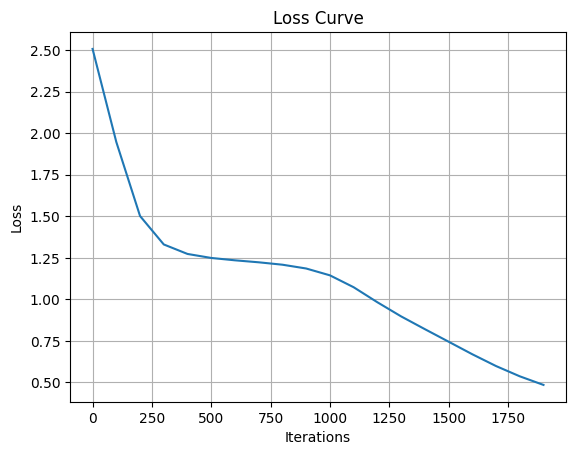

Predictions: 
 [[1.14860824e-01 2.14829962e-01 7.03599053e-01 6.91305184e-01
  4.01724945e-01 2.66366455e-01 9.15839233e-02 4.95773516e-02
  4.10930019e-01 1.63924675e-01 7.87869163e-01 6.54894280e-02
  4.07622381e-01 4.81907764e-02 4.29429815e-02 2.48053243e-01
  4.81907764e-02 9.10711553e-01 9.31373405e-02 4.50873580e-02
  4.81907764e-02 4.29429815e-02 2.30048675e-01 8.79136888e-01
  2.90899094e-01 9.05699859e-01 3.10190814e-02 4.81907764e-02
  4.29429815e-02 2.30048675e-01 5.99874603e-01 1.94740050e-01
  7.39386856e-01 3.55351277e-02 4.29429815e-02 8.75387793e-02
  5.94928171e-01 5.99874603e-01 8.48087840e-01 7.15703477e-01
  6.45900178e-01 4.81907764e-02 9.31373405e-02 6.18930323e-01
  4.81907764e-02 1.48261170e-01 2.83276252e-02 9.36656519e-01
  4.81907764e-02 6.26900849e-01 8.10947929e-01 7.03599053e-01
  2.45913931e-01 9.49983891e-01 9.45912494e-01 7.75641453e-01
  4.81907764e-02 4.81907764e-02 4.81907764e-02 4.81907764e-02
  4.81907764e-02 4.81907764e-02 4.81907764e-02]
 [9.427

In [5]:
# 自编码器类
class Autoencoder:
    def __init__(self, input_size, hidden_size, learning_rate=0.1, iterations=2000, disp_step=100):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.disp_step = disp_step
        self.parameters = self.initialize_parameters()

    def initialize_parameters(self):
        """初始化权重参数"""
        np.random.seed(1)
        W1 = np.random.randn(self.hidden_size, self.input_size) * 0.01
        b1 = np.zeros((self.hidden_size, 1))
        W2 = np.random.randn(self.input_size, self.hidden_size) * 0.01
        b2 = np.zeros((self.input_size, 1))
        return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

    def sigmoid(self, z):
        """Sigmoid 激活函数"""
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        """Sigmoid 导数"""
        return self.sigmoid(z) * (1 - self.sigmoid(z))

    def forward_propagate(self, X):
        """前向传播"""
        W1, b1 = self.parameters["W1"], self.parameters["b1"]
        W2, b2 = self.parameters["W2"], self.parameters["b2"]

        Z1 = np.dot(W1, X) + b1
        A1 = self.sigmoid(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = self.sigmoid(Z2)

        cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
        return A2, cache

    def calculate_cost(self, A2, Y):
        """计算损失函数"""
        m = Y.shape[1]  # 样本数量
        cost = (1. / m) * np.sum(np.square(A2 - Y))
        return np.squeeze(cost)

    def backward_propagate(self, X, Y, cache):
        """反向传播"""
        m = X.shape[1]
        W2 = self.parameters["W2"]

        A1 = cache["A1"]
        A2 = cache["A2"]

        dZ2 = A2 - Y
        dW2 = (1. / m) * np.dot(dZ2, A1.T)
        db2 = (1. / m) * np.sum(dZ2, axis=1, keepdims=True)

        dZ1 = np.dot(W2.T, dZ2) * self.sigmoid_derivative(cache["Z1"])
        dW1 = (1. / m) * np.dot(dZ1, X.T)
        db1 = (1. / m) * np.sum(dZ1, axis=1, keepdims=True)

        grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
        return grads

    def update_parameters(self, grads):
        """参数更新"""
        self.parameters["W1"] -= self.learning_rate * grads["dW1"]
        self.parameters["b1"] -= self.learning_rate * grads["db1"]
        self.parameters["W2"] -= self.learning_rate * grads["dW2"]
        self.parameters["b2"] -= self.learning_rate * grads["db2"]

    def train(self, X, Y, print_cost=False):
        """训练函数"""
        cost_list = []
        for i in range(self.iterations):
            A2, cache = self.forward_propagate(X)
            cost = self.calculate_cost(A2, Y)
            grads = self.backward_propagate(X, Y, cache)
            self.update_parameters(grads)

            if print_cost and i % self.disp_step == 0:
                print(f"Iteration {i}: Cost = {cost}")
                cost_list.append(cost)

        return cost_list

    def predict(self, X):
        """预测函数"""
        A2, _ = self.forward_propagate(X)
        return A2

autoencoder = Autoencoder(input_size=data.shape[0], hidden_size=10, learning_rate=0.1, iterations=2000, disp_step=100)
cost_list = autoencoder.train(data, data, print_cost=True)

#------------------------------------------------------------
# 绘制损失曲线
def plot_loss(cost_list, num_iterations, disp_step):
    plt.plot(range(0, num_iterations, disp_step), cost_list)
    plt.title('Loss Curve')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

plot_loss(cost_list, autoencoder.iterations, autoencoder.disp_step)

# # 预测并展示结果
# X_test = data  # 测试集，这里使用与训练集相同的数据
# predictions = autoencoder.predict(X_test)
# print("Predictions: \n", predictions)

### 图像压缩

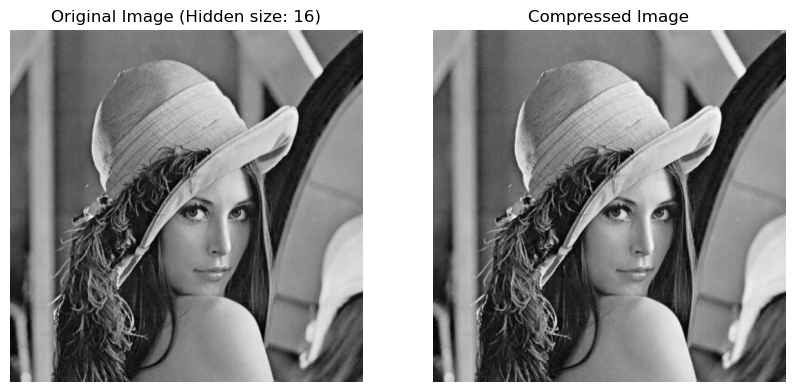

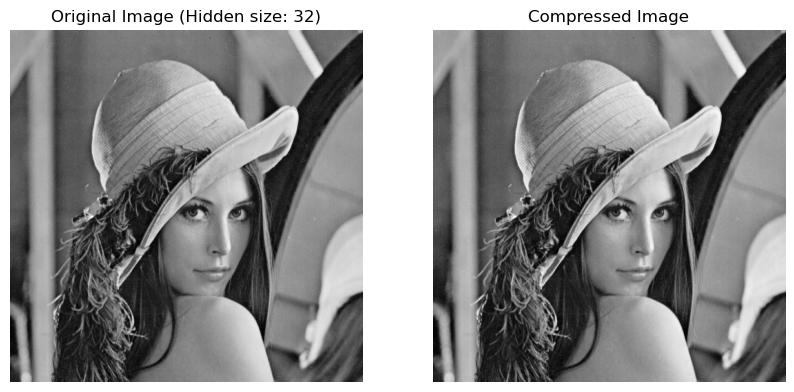

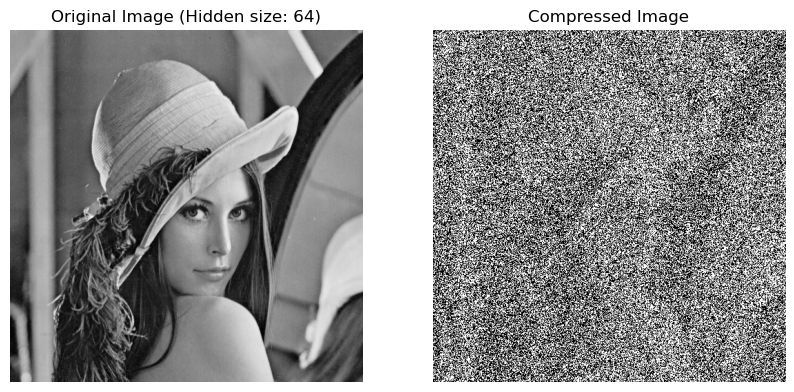

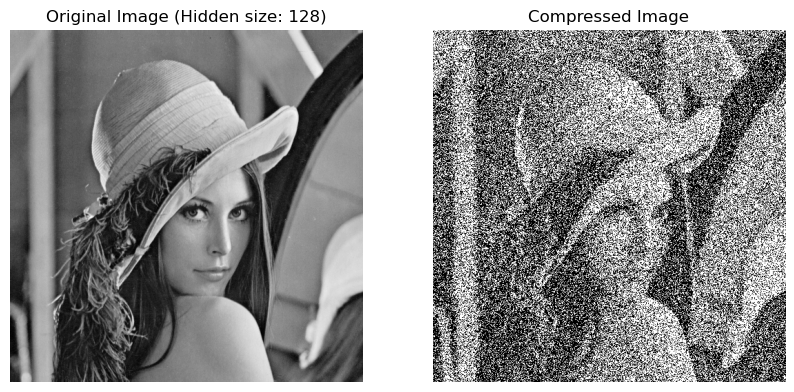

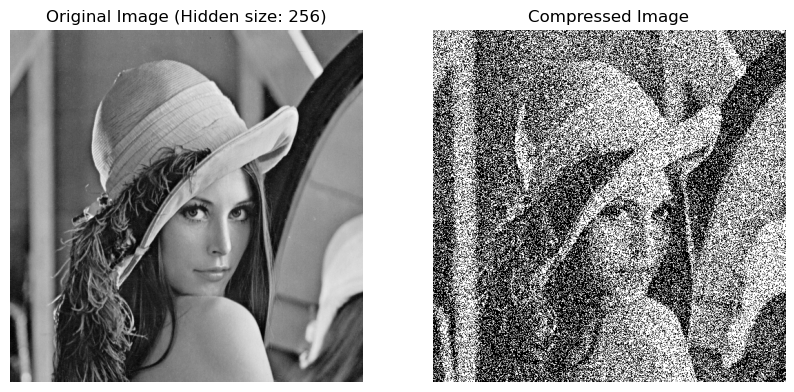

MSE Results: {16: 3.708637973877437e-08, 32: 3.4109125513320794e-08, 64: 0.2683926177676845, 128: 0.22704644359090498, 256: 0.21676581896186864}


In [7]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import mean_squared_error

class Autoencoder(nn.Module):
    def __init__(self, hidden_size):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(262144, hidden_size),
            nn.ReLU(True)
        )
        self.decoder = nn.Sequential(
            nn.Linear(hidden_size, 262144),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

def load_image(image_path):
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    # Optionally resize to a smaller dimension for autoencoder
    image = image.resize((512, 512))  # Resize to 512*512 if needed
    image = transforms.ToTensor()(image).view(-1)  # Flatten the image
    return image

def compress_image(image_path, hidden_size):
    image = load_image(image_path)
    image = image.unsqueeze(0)  # Add batch dimension

    model = Autoencoder(hidden_size)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

    # Training
    model.train()
    for epoch in range(1000):
        optimizer.zero_grad()
        output = model(image)
        loss = criterion(output, image)
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        compressed_image = model(image)

    return compressed_image, image

def main(image_path, hidden_sizes):
    mse_results = {}
    for hidden_size in hidden_sizes:
        compressed_image, original_image = compress_image(image_path, hidden_size)
        mse = mean_squared_error(original_image.numpy(), compressed_image.numpy())
        mse_results[hidden_size] = mse
        
        plt.figure(figsize=(10, 10))  # 增加显示窗口大小
        plt.subplot(1, 2, 1)
        plt.title(f'Original Image (Hidden size: {hidden_size})')
        plt.imshow(original_image.view(512, 512).numpy(), cmap='gray')  # 根据实际分辨率调整
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.title('Compressed Image')
        plt.imshow(compressed_image.view(512, 512).numpy(), cmap='gray')  # 根据实际分辨率调整
        plt.axis('off')
        plt.show()


    return mse_results

if __name__ == '__main__':
    image_path = 'lena_gray.gif'  # Replace with your GIF image path
    hidden_sizes = [16, 32, 64, 128, 256]
    mse_results = main(image_path, hidden_sizes)
    print("MSE Results:", mse_results)
